# K Nearest Neighbours 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
%matplotlib inline

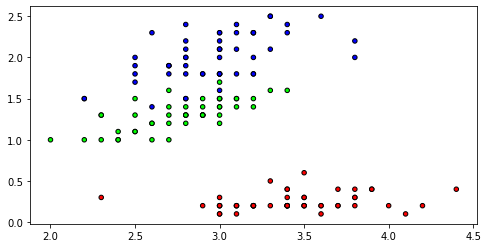

In [50]:
#using the iris dataset

cmap=ListedColormap(['#FF0000','#00FF00','#0000FF'])
iris=datasets.load_iris()
X,y=iris.data,iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

# print(X)
plt.figure(figsize=(8,4))
plt.scatter(X[:,1],X[:,3],c=y,cmap=cmap,edgecolor='k',s=20)

In [ ]:
#KNN:-K Nearest Neighbours
#uses Euclidean distance to calculate the nearest neighbours and classify the given point

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KNN:
    def __init__(self,k=3):
        self.k=k
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
    
    def predict(self,X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)
    def _predict(self,x):
        
        #compute distances
            distances=[euclidean_distance(x,x_train) for x_train in self.X_train]
        #get k nearest samples and their respective labels
            k_indices=np.argsort(distances)[:self.k];
            k_nearest_labels=[self.y_train[i] for i in k_indices]
        #majority vote, getting the most common class label
            most_common=Counter(k_nearest_labels).most_common(1)
            return most_common[0][0]    

In [ ]:
#working of Counter demonstration
#it gives a list of tuples consisting of thye item and the no of times it is repeated

a=[6,6,6,2,2,3,3,4]
most_common=Counter(a).most_common(2)
print(most_common)

In [38]:
clf=KNN(k=3)
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)

#accuracy is calculated by 
#taking the sum of all the instances where predict 
#value is equal to the y_test value and dividing it by the number of values

acc=np.sum(predictions==y_test)/len(y_test)
print(acc)

1.0


In [9]:
#self keyword is passed to all the methods to make them non-static

In [10]:
data=pd.read_csv("Prostate_Cancer.csv")

In [11]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [12]:
def categorise(row):
    if row['diagnosis_result']=='M':
        return int(1)
    else:
        return int(2)
data['result'] = data.apply(lambda row: categorise(row), axis=1)

In [13]:
y=data['result']
X=data.drop(columns=["diagnosis_result","result"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
 10  result             100 non-null    int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 8.7+ KB


In [14]:
clf=KNN(k=int(len(X_train)**0.5))
clf.fit(X_train,y_train)
#predictions=clf.predict(X_test)

In [15]:
sns.heatmap(data.corr(),annot=True)

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

# Linear Regression


In [22]:
class LinearRegression:
    def predict(self,X):
        y_predicted=np.dot(X,self.weights)+self.bias
        return y_predicted
    def __init__(self,lr=0.001,n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
     
    def fit(self,X,y):
        #we implement gradient descent here
        
        #initialize parameters
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        for _ in range(self.n_iters):
            y_predicted=np.dot(X,self.weights) + self.bias
            
            dw=(1/n_samples)*np.dot(X.T,(y_predicted-y))
            db=(1/n_samples)*np.sum(y_predicted-y)
            
            self.weights-=self.lr*dw
            self.bias-=self.lr*db       

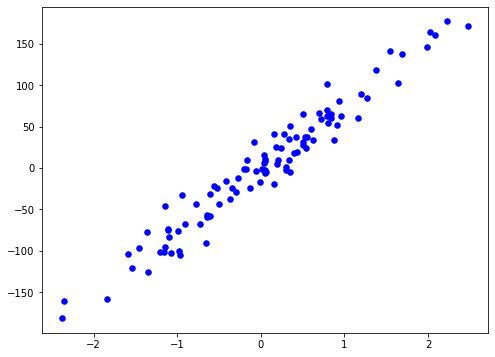

(80, 1)
(80,)


In [23]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y,color="b",marker="o",s=30)
plt.show()
print(X_train.shape)
print(y_train.shape)

In [25]:
regressor=LinearRegression(lr=0.01)
regressor.fit(X_train,y_train)
predicted=regressor.predict(X_test)

def mse(y_true,y_predicted):
    return np.mean((y_true-y_predicted)**2)
mse_value=mse(y_test,predicted)
print(mse_value)

305.7719958301902


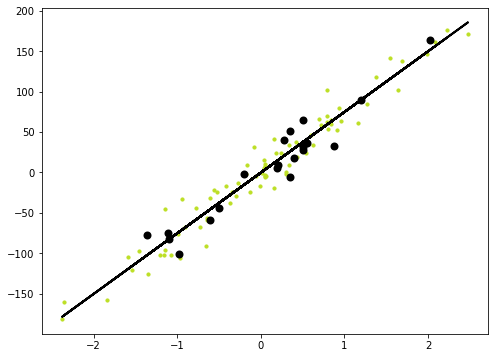

In [27]:
y_pred_line=regressor.predict(X)
cmap=plt.get_cmap('viridis')
fig=plt.figure(figsize=(8,6))
m1=plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2=plt.scatter(X_test,y_test,color='black',linewidth=2,label="Prediction")
plt.plot(X,y_pred_line,color='black',linewidth=2,label="Prediction")
plt.show()

Text(0, 0.5, 'Residual')

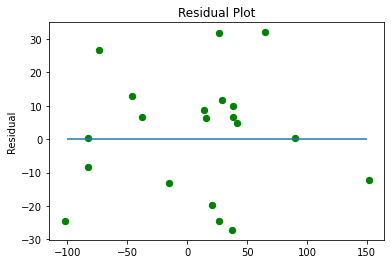

In [33]:
#Residual Analysis

plt.scatter(predicted,predicted-y_test,c='g',s=40)
plt.hlines(y=0,xmin=-100,xmax=150)
plt.title("Residual Plot")
plt.ylabel("Residual")

# Logistic Regression 

In [46]:
class LogisticRegression:
    def  __init__(self,lr=0.001,n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None  
    def fit(self,X,y):
        #init parameters
        n_samples,n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        
        #gradient descent
        for _ in range(self.n_iters):
            linear_model=np.dot(X,self.weights)+self.bias
            y_predicted=self._sigmoid(linear_model) 
            
            dw=(1/n_samples)*np.dot(X.T,(y_predicted-y))
            db=(1/n_samples)*np.sum(y_predicted-y)
            self.weights-=self.lr*dw
            self.bias-=self.lr*db
    def predict(self,X): 
            linear_model=np.dot(X,self.weights)+self.bias
            y_predicted=self._sigmoid(linear_model) 
            y_predicted_cls=[1 if i>0.5 else 0 for i in y_predicted]
            return y_predicted_cls
    def _sigmoid(self,x):
        return 1/(1+np.exp(-x))

In [47]:
bc=datasets.load_breast_cancer()
X,y=iris.data,iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)

def accuracy(y_true,y_pred):
    accuracy=np.sum(y_true==y_pred)/len(y_true)
    return accuracy

regressor=LogisticRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)

print(accuracy(y_test,predictions))

0.43333333333333335
